In [1]:
import scCube
from scCube import scCube
from scCube.visualization import *
from scCube.utils import *
from matplotlib.pyplot import rc_context
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

/slurm/home/yrd/fanlab/qianjingyang/.conda/envs/sccube/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = scCube()

In [3]:
sc_adata = sc.read_h5ad('demo_data/customized_bc_adata.h5ad')

In [4]:
sc_adata.obs['Cell_type'].value_counts()

Endothelial              816
Cancer/Epithelial        681
T-cells                  476
CAFs                     359
PVL cells                302
Myoepithelial            206
Monocytes/Macrophages    105
B-cells                   36
Plasmablasts              19
Name: Cell_type, dtype: int64

In [5]:
CustomGenerator = SPatternGeneratorCustom(
    sc_adata=sc_adata,
    cell_num=5000, 
    celltype_key='Cell_type',
    set_seed=True, 
    seed=12345, 
    spatial_size=50, 
    select_celltype=['T-cells', 'Endothelial', 'Cancer/Epithelial', 'CAFs'], )

generating unstructured mixed spatial patterns...


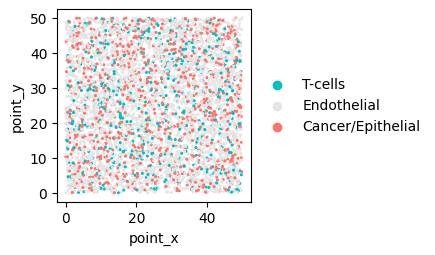

In [6]:
# mixing
meta_new = CustomGenerator.simulate_mixing(prop_list=[0.1, 0.7, 0.2, 0])

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=meta_new, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, palette=["#00BFC4", "#E5E5E5", "#F8766D"])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

generating structured cluster spatial patterns...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `background_prop` is provided, each background cell type follows an equal proportion...


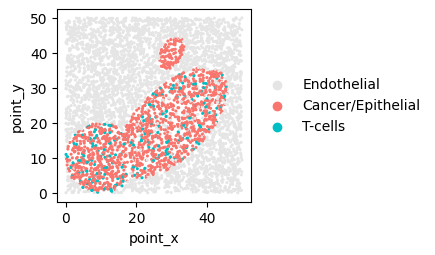

In [7]:
# cluster
shape_list = ['Circle', 'Oval', 'Oval']
cluster_celltype_list = ['Cancer/Epithelial', 'Cancer/Epithelial', 'Cancer/Epithelial']
cluster_purity_list = [0.8, 0.75, 1]
infiltration_celltype_list = [['T-cells', 'Endothelial'], ['T-cells', 'Endothelial'], ['T-cells', 'Endothelial']]
infiltration_prop_list = [[0.9, 0.1], [0.5, 0.5], None]
background_celltype = ['Endothelial']
background_prop = None
center_x_list = [10, 30, 30]
center_y_list = [10, 20, 40]
a_list = [10, 20, 5]
b_list = [10, 10, 3]
theta_list = [np.pi / 4, np.pi / 4, np.pi / 3]
scale_value_list = [4.8, 4.8, 5.5]
twist_value_list = [0.5, 0.5, 2.5]


meta_new = CustomGenerator.simulate_cluster(
    shape_list=shape_list,
    cluster_celltype_list=cluster_celltype_list,
    cluster_purity_list=cluster_purity_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,
    center_x_list=center_x_list,
    center_y_list=center_y_list,
    a_list=a_list,
    b_list=b_list,
    theta_list=theta_list,
    scale_value_list=scale_value_list,
    twist_value_list=twist_value_list)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=meta_new, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, palette=[ "#E5E5E5", "#F8766D", "#00BFC4"])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

generating structured immune ring spatial patterns...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `background_prop` is provided, each background cell type follows an equal proportion...


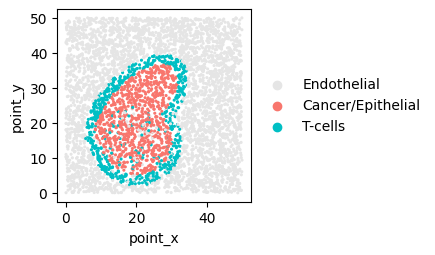

In [8]:
# ring
shape_list=['Oval', 'Circle']
ring_celltype_list=[['Cancer/Epithelial', 'T-cells'], ['Cancer/Epithelial', 'T-cells']]
ring_purity_list=[1, 0.8]
infiltration_celltype_list=[['T-cells', 'Endothelial'], ['T-cells', 'Endothelial']]
infiltration_prop_list=[[0.9, 0.1], None]
background_celltype=['Endothelial']
background_prop=None
center_x_list=[20, 20]
center_y_list=[25, 15]
ring_width_list=[[3], [3]]
a_list=[15, 10]
b_list=[7, 10]
theta_list=[np.pi / 4, np.pi / 4]


meta_new = CustomGenerator.simulate_ring(
    shape_list=shape_list,
    ring_celltype_list=ring_celltype_list,
    ring_purity_list=ring_purity_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,
    center_x_list=center_x_list,
    center_y_list=center_y_list,
    ring_width_list=ring_width_list,
    a_list=a_list,
    b_list=b_list,
    theta_list=theta_list,)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
p = sns.scatterplot(data=meta_new, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, palette=[ "#E5E5E5", "#F8766D", "#00BFC4"])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

generating structured immune ring spatial patterns...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `background_prop` is provided, each background cell type follows an equal proportion...


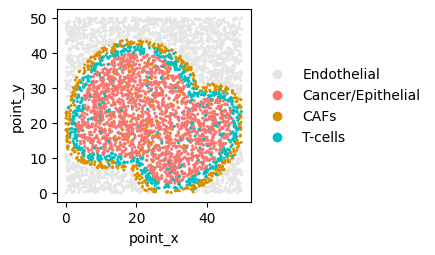

In [9]:
# double ring
shape_list=['Oval', 'Oval', 'Circle']
ring_celltype_list=[['Cancer/Epithelial', 'T-cells', 'CAFs'], ['Cancer/Epithelial', 'T-cells', 'CAFs'], ['Cancer/Epithelial', 'T-cells', 'CAFs']]
ring_purity_list=[0.9, 0.9, 0.9]
infiltration_celltype_list=[['T-cells', 'CAFs'], ['T-cells', 'CAFs'], ['T-cells', 'CAFs']]
infiltration_prop_list=[None, [0.9, 0.1], None]
background_celltype=['Endothelial']
background_prop=None
center_x_list=[12, 35, 20]
center_y_list=[20, 15, 25]
ring_width_list=[[2, 2], [2, 2], [2, 2]]
a_list=[10, 15, 15]
b_list=[8, 9, 15]
theta_list=[np.pi / 4, np.pi / 4, np.pi / 4]


meta_new = CustomGenerator.simulate_ring(
    shape_list=shape_list,
    ring_celltype_list=ring_celltype_list,
    ring_purity_list=ring_purity_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,
    center_x_list=center_x_list,
    center_y_list=center_y_list,
    ring_width_list=ring_width_list,
    a_list=a_list,
    b_list=b_list,
    theta_list=theta_list,)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=meta_new, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, 
                    palette=[ "#E5E5E5", "#F8766D", "#D89000", "#00BFC4"])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()

generating structured stripes spatial patterns...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `infiltration_prop` is provided, each infiltrated cell type follows an equal proportion...
no `background_prop` is provided, each background cell type follows an equal proportion...


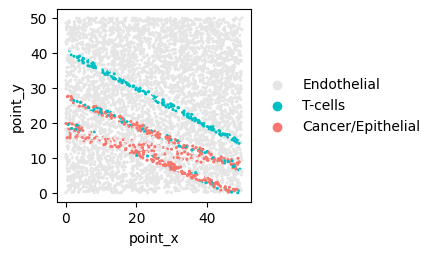

In [10]:
# stripe
y1_list=[None, None, None, None]
y2_list=[None, None, None, None]
stripe_width_list=[2, 1.5, 3, 2]
stripe_celltype_list=['Cancer/Epithelial', 'T-cells', 'Cancer/Epithelial', 'Cancer/Epithelial']
stripe_purity_list=[0.8, 1, 0.5, 0.7]
infiltration_celltype_list=[['T-cells'], ['Endothelial'], ['Endothelial'], ['T-cells']]
infiltration_prop_list=[None, None, None, None]
background_celltype=['Endothelial']
background_prop=None


meta_new = CustomGenerator.simulate_stripes(
    y1_list=y1_list,
    y2_list=y2_list,
    stripe_width_list=stripe_width_list,
    stripe_celltype_list=stripe_celltype_list,
    stripe_purity_list =stripe_purity_list,
    infiltration_celltype_list=infiltration_celltype_list,
    infiltration_prop_list=infiltration_prop_list,
    background_celltype=background_celltype,
    background_prop=background_prop,)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
sns.scatterplot(data=meta_new, x="point_x", y="point_y", hue="Cell_type", s=5, linewidth=0, palette=[ "#E5E5E5", "#00BFC4", "#F8766D"])
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()